# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


# 1. Loading, Displaying Data and Model Training 

In [2]:
# Common imports
import numpy as np
import os, time
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

2024-08-15 00:06:23.375029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1.1 Loading Data

In [3]:
X_train = pd.read_csv('sign_mnist_train.csv')
X_big_test = pd.read_csv('sign_mnist_test.csv')


### 1.1.1 Data Inspection

The training set has 27455 images, each of which is 32* 32

In [4]:
print(X_train.shape)
print(X_big_test.shape)

(27455, 1025)
(7172, 1025)


In [5]:
print(X_train)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     157     157     157     157     157     158   
2          2     187     188     188     188     188     188     188     188   
3          2     211     211     212     212     212     212     212     212   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     175   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     182     182     183   

       pixel9  ...  pixel1015  pixel101

In [123]:
# Check the data info
X_train.info()
X_big_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 214.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 56.1 MB


### 1.1.2 Dataset

In [6]:
# Get the training set and test set 
y_train = X_train['label']
X_train = X_train.drop('label', axis=1)
y_big_test = X_big_test['label']
X_big_test = X_big_test.drop('label', axis=1)

# Scale the data
X_train = X_train/255.0
X_big_test = X_big_test/255.0

# Split the test set into validation and test set with 50:50
from sklearn.model_selection import train_test_split
X_valid, X_test, y_valid, y_test = train_test_split(X_big_test,y_big_test,test_size=0.5, random_state=42, stratify=y_big_test)

In [7]:
# Transform the data into numpy array and reshape the data to 32x32x1
X_train_numpy = X_train.to_numpy()
X_valid_numpy = X_valid.to_numpy()
X_test_numpy = X_test.to_numpy()

X_train = X_train_numpy.reshape(-1,32,32,1)
X_valid = X_valid_numpy.reshape(-1,32,32,1)
X_test = X_test_numpy.reshape(-1,32,32,1)


## 1.2 Displaying Data

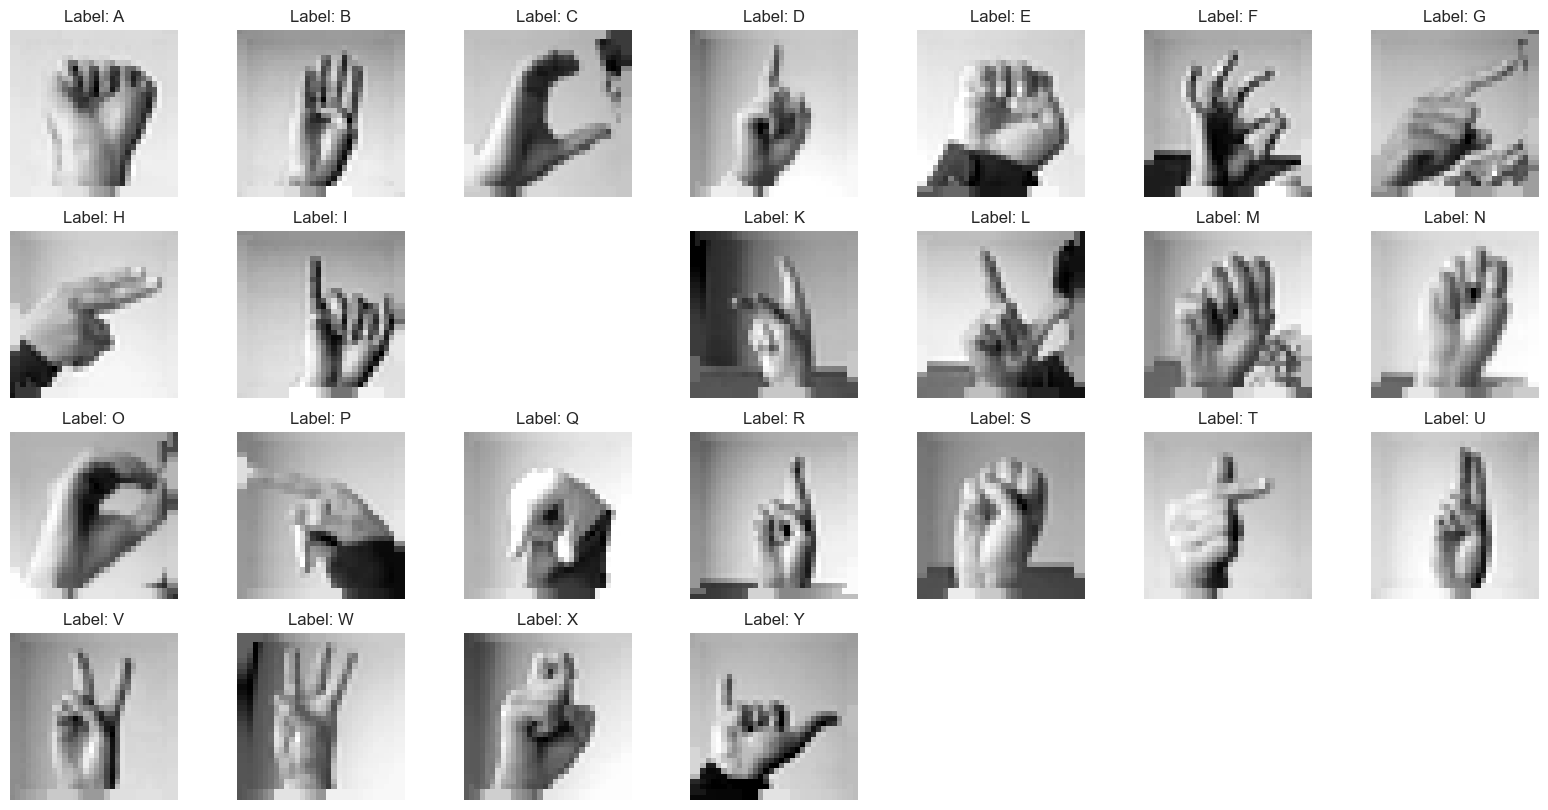

In [8]:
# Display sample of each letter

class_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I","J","K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y","Z"])

plt.figure(figsize=(20, 10))
num_classes = len(class_names)
for i in range(num_classes):
    label = i
    indices = np.where(y_train == label)[0] 
    if len(indices) > 0:
        index = indices[0]
        image = X_train[index]
        plt.subplot(4, 7, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {class_names[i]}")
        plt.axis('off')
plt.show()

Total Unique Classes:  24


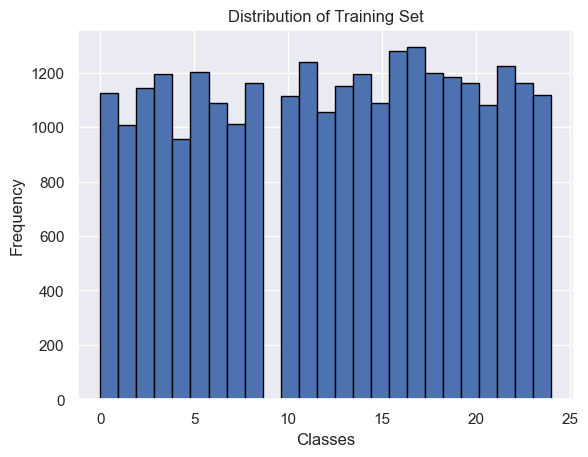

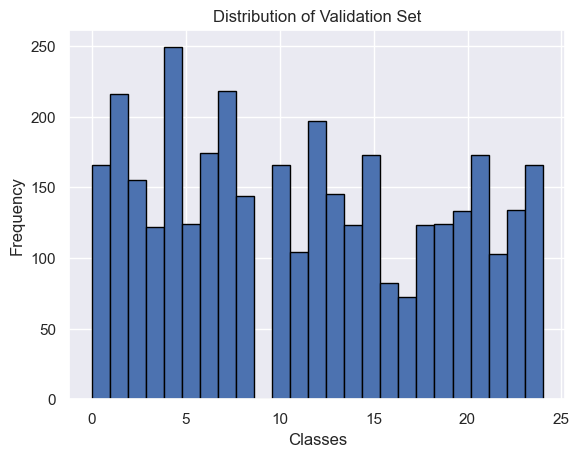

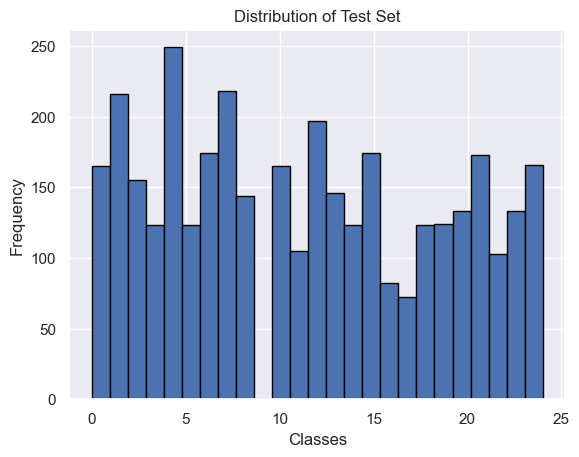

In [12]:
# Check the distribution of labels in the training, validation and test sets

unique_total = np.unique(y_train).shape[0]

print("Total Unique Classes: ", unique_total)

plt.hist(y_train, bins=25,edgecolor='black')
plt.title('Distribution of Training Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

plt.hist(y_valid, bins=25,edgecolor='black')
plt.title('Distribution of Validation Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


plt.hist(y_test, bins=25,edgecolor='black')
plt.title('Distribution of Test Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

## 1.3 Model Training (Baseline)

In [14]:
# Since the labels do not include index 9, we need to remap the labels
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

unique_labels = np.unique(y_train)
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}

y_train = np.vectorize(label_mapping.get)(y_train)
y_valid = np.vectorize(label_mapping.get)(y_valid)
y_test = np.vectorize(label_mapping.get)(y_test)


### Densely Connected Network

In [15]:
# Use the model from workshop 9
#  1 input layer + 2 hidden layers of sizes 300 and 100 + 1 output layer
model_dcn = keras.models.Sequential()   
model_dcn.add(keras.layers.Flatten(input_shape = [32 , 32, 1]))   
model_dcn.add(keras.layers.Dense(300, activation = "relu"))    # first hidden layer
model_dcn.add(keras.layers.Dense(100, activation = "relu"))    # second hidden layer
model_dcn.add(keras.layers.Dense(24, activation = "softmax"))  # output layer

2024-08-15 09:40:10.962516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Check the parameters
model_dcn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 300)               307500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 24)                2424      
                                                                 
Total params: 340,024
Trainable params: 340,024
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_dcn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [18]:
history_dcn = model_dcn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
858/858 [==============================] - 1s 1ms/step - loss: 2.5997 - accuracy: 0.2602 - val_loss: 2.0883 - val_accuracy: 0.3829
Epoch 2/5
858/858 [==============================] - 1s 1ms/step - loss: 1.6783 - accuracy: 0.4940 - val_loss: 1.7043 - val_accuracy: 0.4451
Epoch 3/5
858/858 [==============================] - 1s 1ms/step - loss: 1.2703 - accuracy: 0.6102 - val_loss: 1.4597 - val_accuracy: 0.5418
Epoch 4/5
858/858 [==============================] - 1s 1ms/step - loss: 1.0336 - accuracy: 0.6849 - val_loss: 1.2151 - val_accuracy: 0.6138
Epoch 5/5
858/858 [==============================] - 1s 1ms/step - loss: 0.8501 - accuracy: 0.7406 - val_loss: 1.1404 - val_accuracy: 0.6592


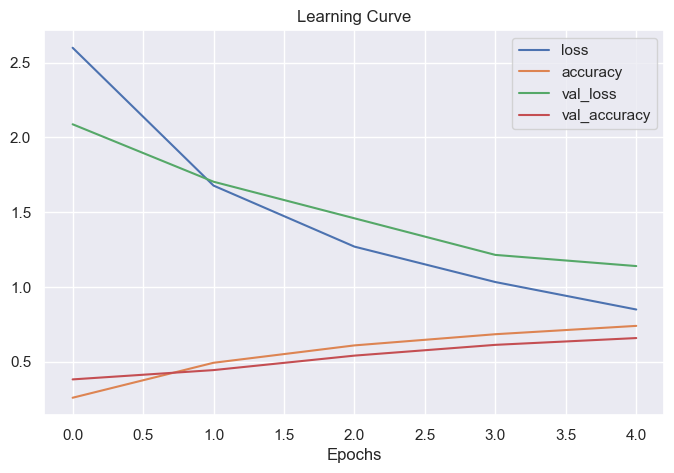

In [19]:
pd.DataFrame(history_dcn.history).plot(figsize=(8 , 5))
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.grid(True)  
plt.legend(loc='best')  
plt.show()

113/113 [==============================] - 0s 543us/step
Accuracy for label A: 0.90
Accuracy for label B: 0.72
Accuracy for label C: 0.99
Accuracy for label D: 0.68
Accuracy for label E: 0.81
Accuracy for label F: 0.72
Accuracy for label G: 0.67
Accuracy for label H: 0.79
Accuracy for label I: 0.69
Accuracy for label K: 0.87
Accuracy for label L: 1.00
Accuracy for label M: 0.77
Accuracy for label N: 0.38
Accuracy for label O: 0.45
Accuracy for label P: 0.90
Accuracy for label Q: 0.83
Accuracy for label R: 0.21
Accuracy for label S: 0.21
Accuracy for label T: 0.35
Accuracy for label U: 0.23
Accuracy for label V: 0.44
Accuracy for label W: 0.59
Accuracy for label X: 0.55
Accuracy for label Y: 0.52
Median accuracy: 0.68


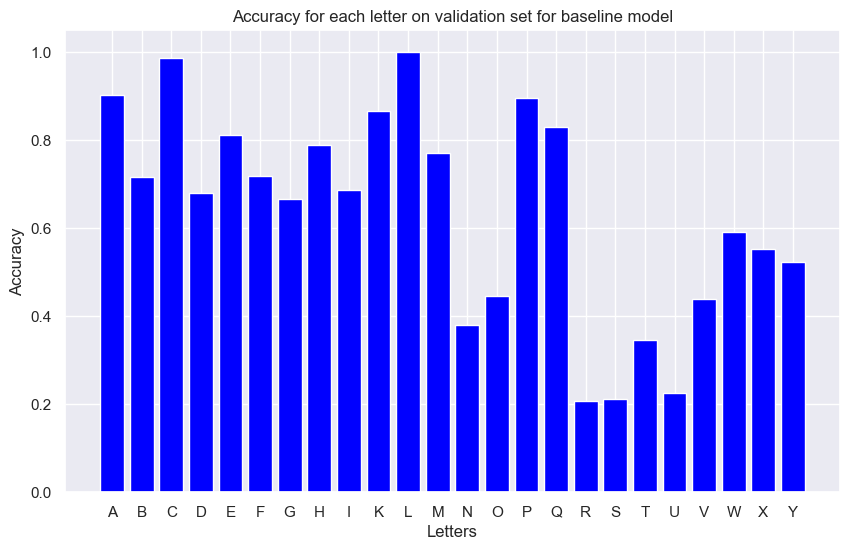

In [20]:
# caculate the median accuracy and each letter's accuracy for DNN model on validation set 
class_names_remap = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"])

y_valid_pred = np.argmax(model_dcn.predict(X_valid), axis=-1)
label_accuracies = {}
for i, class_name in enumerate(class_names_remap):
    
    indices = np.where(y_valid == i)[0]
    label_accuracy = np.mean(y_valid_pred[indices] == y_valid[indices])
    label_accuracies[class_name] = label_accuracy

for label, accuracy in label_accuracies.items():
    print(f"Accuracy for label {label}: {accuracy:.2f}")

# Calculate and print the median accuracy
median_accuracy = np.median(list(label_accuracies.values()))
print(f"Median accuracy: {median_accuracy:.2f}")

labels = list(label_accuracies.keys())
accuracies = list(label_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Letters')
plt.ylabel('Accuracy')
plt.title('Accuracy for each letter on validation set for baseline model')
plt.show()

# 2. Model Optimisation

## 2.1 DNN model

In [22]:
# Define the number of neurons in each hidden layer
#hiddensizes = [300,100]
# Use 3 hidden layers since the maximum parameter is 500000
hiddensizes = [300,300,300]

# Define the activation function to be used by hidden layers
actfn = "relu"

# Optimiser and add learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01

# Set size of batch and number of epochs
batch_size = 32  
n_epochs = 20

In [23]:
from tensorflow.keras.layers import  BatchNormalization
from keras import regularizers
# Build a general DNN (using dense layers)
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate, l2reg = 0.001):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [32, 32, 1]))
       
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn, kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(24, activation = "softmax", kernel_regularizer=regularizers.l2(l2reg)))   
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

# Early stopping callback 
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def do_all(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_valid, y_valid))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [24]:
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate,n_epochs, batch_size)

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.2977 - accuracy: 0.3294 - val_loss: 1.7911 - val_accuracy: 0.4955
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 1.3747 - accuracy: 0.5828 - val_loss: 1.5777 - val_accuracy: 0.5067
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.0238 - accuracy: 0.6937 - val_loss: 1.5062 - val_accuracy: 0.5496
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 0.7786 - accuracy: 0.7752 - val_loss: 0.9744 - val_accuracy: 0.7340
Epoch 5/20
858/858 [==============================] - 1s 2ms/step - loss: 0.6369 - accuracy: 0.8232 - val_loss: 0.9339 - val_accuracy: 0.7245
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 0.5029 - accuracy: 0.8671 - val_loss: 0.8861 - val_accuracy: 0.7217
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 0.3770 - accuracy: 0.9089 - val_loss: 0.8209 - val_accuracy: 0.7677
Epoch 

In [296]:
model.summary()

Model: "sequential_154"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_151 (Flatten)       (None, 1024)              0         
                                                                 
 dense_427 (Dense)           (None, 300)               307500    
                                                                 
 dense_428 (Dense)           (None, 300)               90300     
                                                                 
 dense_429 (Dense)           (None, 300)               90300     
                                                                 
 dense_430 (Dense)           (None, 24)                7224      
                                                                 
Total params: 495,324
Trainable params: 495,324
Non-trainable params: 0
_________________________________________________________________


In [25]:
# PLot the epoch associated with the learning curve
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show()

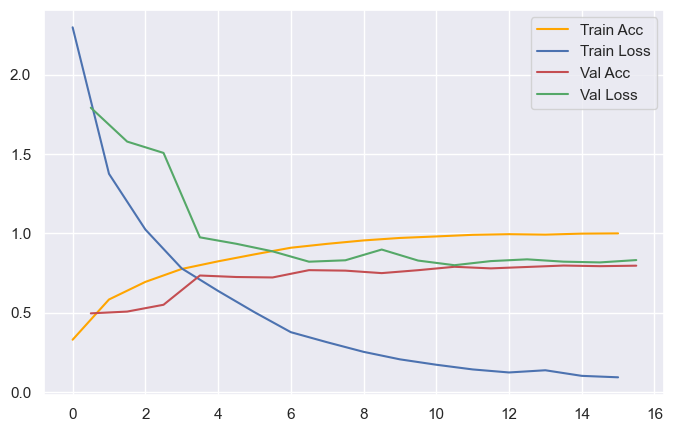

In [26]:
plot_history(history)

### 2.1.1 Exploring the learning rate

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 23.9204 - accuracy: 0.0432 - val_loss: 3.4848 - val_accuracy: 0.0463
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 3.4270 - accuracy: 0.0425 - val_loss: 3.4228 - val_accuracy: 0.0343
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 3.3699 - accuracy: 0.0431 - val_loss: 3.3661 - val_accuracy: 0.0346
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 3.3208 - accuracy: 0.0446 - val_loss: 3.3287 - val_accuracy: 0.0290
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 3.2800 - accuracy: 0.0441 - val_loss: 3.2812 - val_accuracy: 0.0201
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 3.2457 - accuracy: 0.0443 - val_loss: 3.2557 - val_accuracy: 0.0343
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 3.2165 - accuracy: 0.0448 - val_loss: 3.2436 - val_accuracy: 0.0287
Epoch

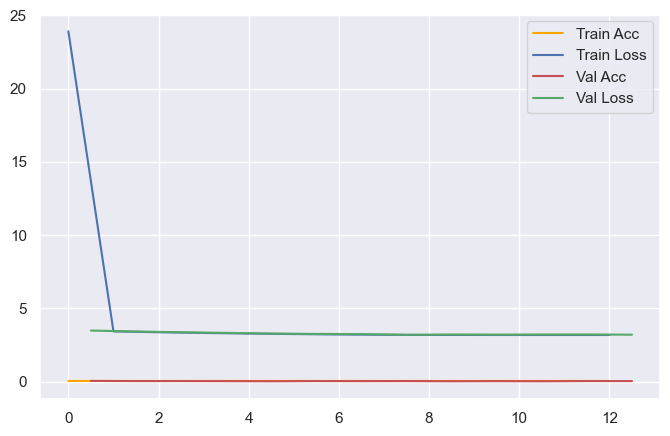

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.3173 - accuracy: 0.2794 - val_loss: 1.6338 - val_accuracy: 0.4805
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 0.9455 - accuracy: 0.6792 - val_loss: 1.2706 - val_accuracy: 0.5990
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 0.4596 - accuracy: 0.8524 - val_loss: 1.3470 - val_accuracy: 0.6648
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.9081 - val_loss: 1.4121 - val_accuracy: 0.6668
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 0.1999 - accuracy: 0.9466 - val_loss: 1.3959 - val_accuracy: 0.7044
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.1473 - accuracy: 0.9662 - val_loss: 1.2622 - val_accuracy: 0.7440
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.0989 - accuracy: 0.9804 - val_loss: 1.0212 - val_accuracy: 0.7911
Epoch 

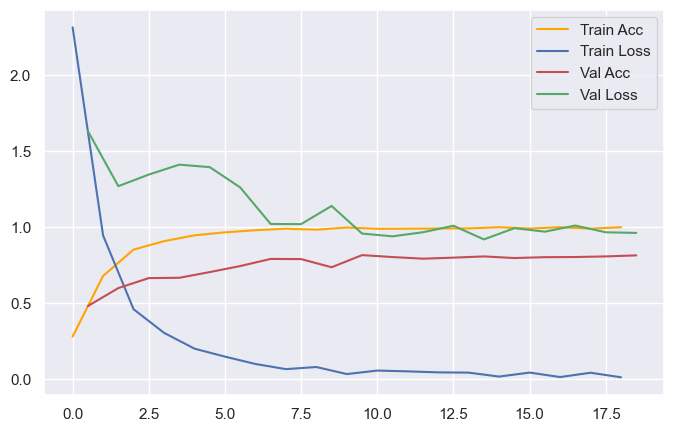

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 1.9422 - accuracy: 0.4149 - val_loss: 1.5069 - val_accuracy: 0.5360
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 0.9729 - accuracy: 0.7049 - val_loss: 1.1321 - val_accuracy: 0.6347
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 0.5873 - accuracy: 0.8269 - val_loss: 1.0617 - val_accuracy: 0.6735
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 0.3725 - accuracy: 0.9015 - val_loss: 0.8794 - val_accuracy: 0.7328
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 0.2410 - accuracy: 0.9452 - val_loss: 0.9183 - val_accuracy: 0.7418
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.1635 - accuracy: 0.9719 - val_loss: 0.8800 - val_accuracy: 0.7630
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.1260 - accuracy: 0.9818 - val_loss: 0.8232 - val_accuracy: 0.8042
Epoch 

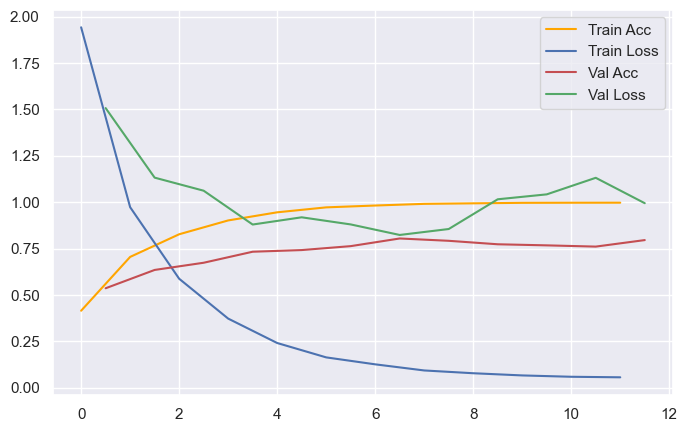

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.7067 - accuracy: 0.2824 - val_loss: 2.3049 - val_accuracy: 0.3477
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 1.9331 - accuracy: 0.4908 - val_loss: 1.8284 - val_accuracy: 0.4774
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 1.5077 - accuracy: 0.6002 - val_loss: 1.5652 - val_accuracy: 0.5496
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 1.2482 - accuracy: 0.6729 - val_loss: 1.3928 - val_accuracy: 0.5945
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 1.0688 - accuracy: 0.7221 - val_loss: 1.3004 - val_accuracy: 0.6090
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.9252 - accuracy: 0.7641 - val_loss: 1.2184 - val_accuracy: 0.6364
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.8097 - accuracy: 0.7933 - val_loss: 1.1438 - val_accuracy: 0.6511
Epoch 

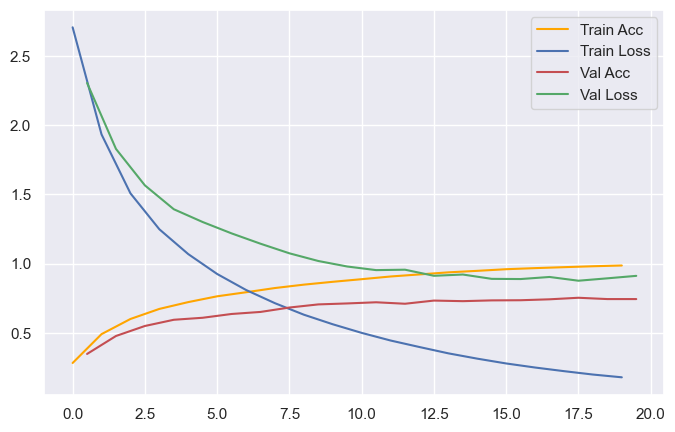

[[0.1, 0.046291131526231766], [0.01, 0.8162297606468201], [0.001, 0.8042386770248413], [0.0001, 0.7534857988357544]]


In [33]:
# Learning rate
res=[]
for lr in [0.1,0.01,0.001,0.0001]:
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_epochs, batch_size)
    plot_history(history)
    res += [[lr,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

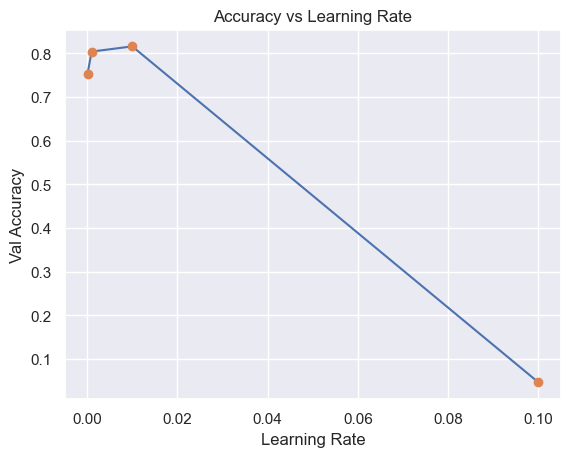

In [34]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

Although when the learning rate is 0.01 the accuracy for the validation set is the best, the performance smoother when the learning rate is 0.0001.

### 2.1.2 Exploring Optimisers

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 3.3169 - accuracy: 0.0485 - val_loss: 3.2173 - val_accuracy: 0.0867
Epoch 2/20
858/858 [==============================] - 1s 2ms/step - loss: 3.1848 - accuracy: 0.0759 - val_loss: 3.1759 - val_accuracy: 0.1057
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 3.1466 - accuracy: 0.0971 - val_loss: 3.1567 - val_accuracy: 0.1102
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 3.1180 - accuracy: 0.1137 - val_loss: 3.1317 - val_accuracy: 0.1238
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 3.0927 - accuracy: 0.1329 - val_loss: 3.1094 - val_accuracy: 0.1414
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 3.0680 - accuracy: 0.1524 - val_loss: 3.0857 - val_accuracy: 0.1458
Epoch 7/20
858/858 [==============================] - 1s 2ms/step - loss: 3.0423 - accuracy: 0.1818 - val_loss: 3.0609 - val_accuracy: 0.1997
Epoch 

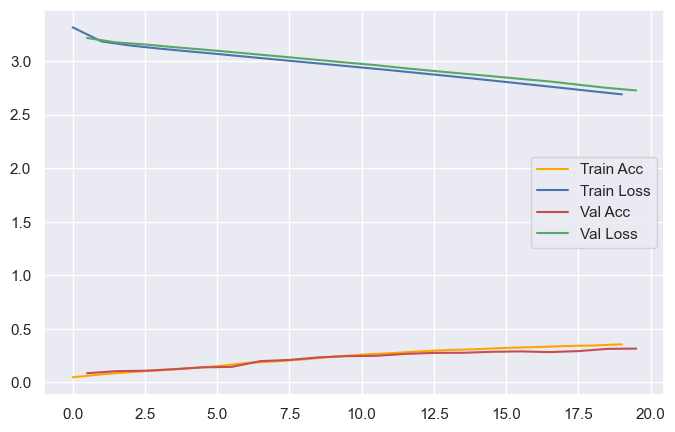

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.1542 - accuracy: 0.3988 - val_loss: 1.6478 - val_accuracy: 0.4816
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 1.1589 - accuracy: 0.6726 - val_loss: 1.2085 - val_accuracy: 0.6472
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 0.8076 - accuracy: 0.7792 - val_loss: 1.0895 - val_accuracy: 0.6629
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 0.5907 - accuracy: 0.8475 - val_loss: 0.9900 - val_accuracy: 0.6905
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.8949 - val_loss: 0.9223 - val_accuracy: 0.7457
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.3289 - accuracy: 0.9320 - val_loss: 0.9041 - val_accuracy: 0.7323
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.2544 - accuracy: 0.9531 - val_loss: 0.8567 - val_accuracy: 0.7479
Epoch 

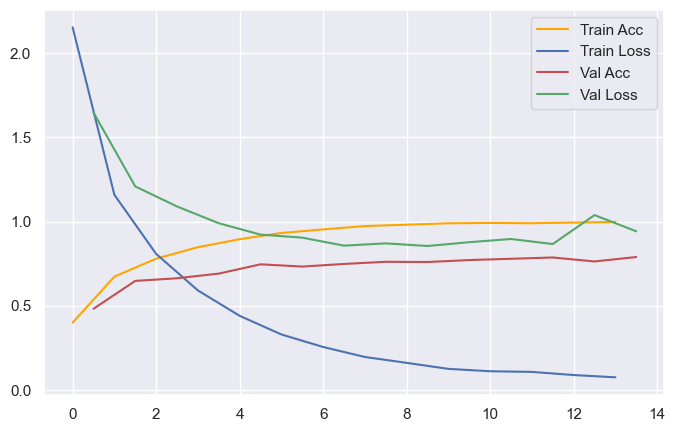

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.2364 - accuracy: 0.3741 - val_loss: 1.7348 - val_accuracy: 0.5056
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 1.2807 - accuracy: 0.6315 - val_loss: 1.3645 - val_accuracy: 0.6207
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 0.9148 - accuracy: 0.7383 - val_loss: 1.1974 - val_accuracy: 0.6545
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 0.6990 - accuracy: 0.8052 - val_loss: 1.0623 - val_accuracy: 0.6754
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.8543 - val_loss: 0.9838 - val_accuracy: 0.7153
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.4351 - accuracy: 0.8871 - val_loss: 0.9260 - val_accuracy: 0.7248
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.3447 - accuracy: 0.9144 - val_loss: 1.0177 - val_accuracy: 0.6952
Epoch 

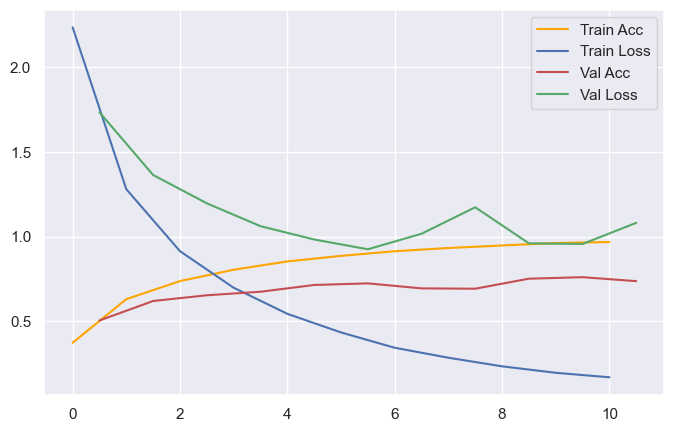

Epoch 1/20
858/858 [==============================] - 3s 2ms/step - loss: 2.0611 - accuracy: 0.4365 - val_loss: 1.5398 - val_accuracy: 0.5460
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 1.0924 - accuracy: 0.7030 - val_loss: 1.2192 - val_accuracy: 0.6163
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 0.7548 - accuracy: 0.8040 - val_loss: 1.0855 - val_accuracy: 0.6818
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.8661 - val_loss: 1.0042 - val_accuracy: 0.6746
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.9091 - val_loss: 0.9699 - val_accuracy: 0.7164
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.2967 - accuracy: 0.9451 - val_loss: 0.9081 - val_accuracy: 0.7610
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.2223 - accuracy: 0.9676 - val_loss: 0.8698 - val_accuracy: 0.7554
Epoch 

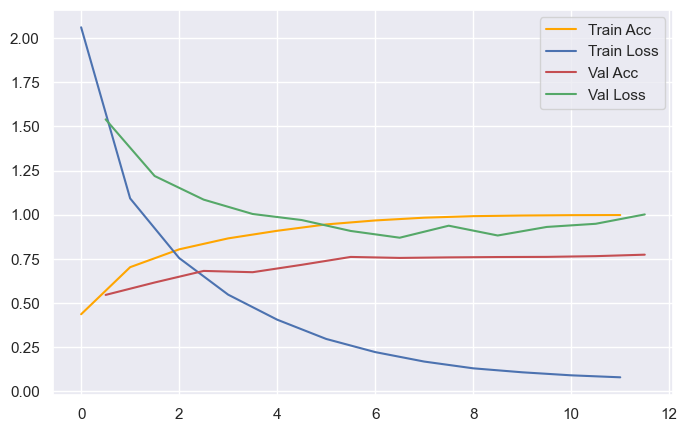

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.7054 - accuracy: 0.2692 - val_loss: 2.3211 - val_accuracy: 0.4021
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 1.9326 - accuracy: 0.5033 - val_loss: 1.8589 - val_accuracy: 0.4955
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 1.5168 - accuracy: 0.6045 - val_loss: 1.6112 - val_accuracy: 0.5181
Epoch 4/20
858/858 [==============================] - 2s 2ms/step - loss: 1.2609 - accuracy: 0.6681 - val_loss: 1.4567 - val_accuracy: 0.5605
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 1.0784 - accuracy: 0.7183 - val_loss: 1.3226 - val_accuracy: 0.6023
Epoch 6/20
858/858 [==============================] - 2s 2ms/step - loss: 0.9410 - accuracy: 0.7575 - val_loss: 1.2344 - val_accuracy: 0.6311
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.8204 - accuracy: 0.7962 - val_loss: 1.1406 - val_accuracy: 0.6537
Epoch 

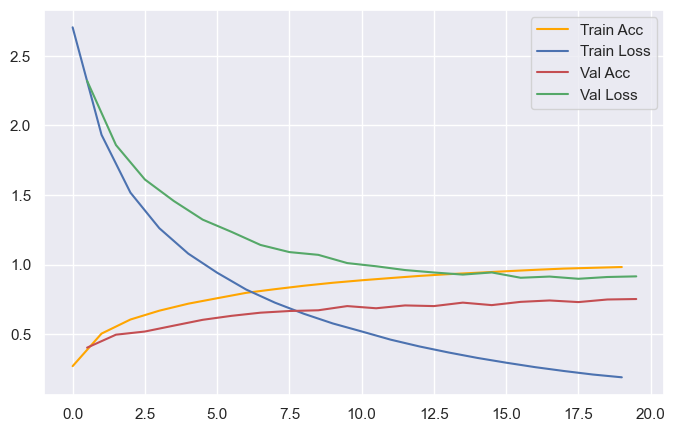

[[0.3167875111103058], [0.7891801595687866], [0.7612939476966858], [0.7738426923751831], [0.7518125772476196]]


In [29]:
res=[]
optimizer_setup = [[keras.optimizers.SGD,0.0001], [keras.optimizers.Adam,0.0001],[keras.optimizers.RMSprop, 0.0001], [keras.optimizers.Nadam, 0.0001],[keras.optimizers.Adamax, 0.0001]]
for optimizer,lr in optimizer_setup :
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]
print(res)


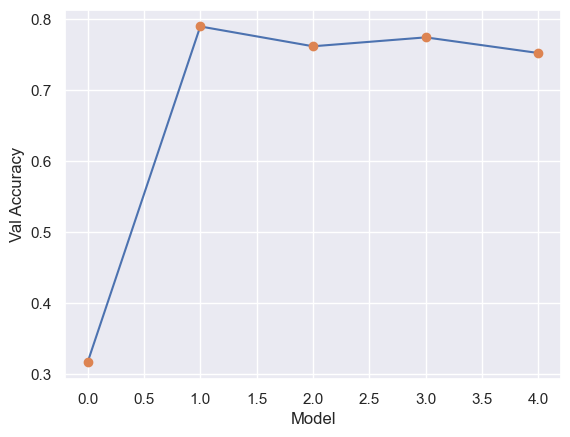

In [30]:
res=np.array(res)
plt.plot(res)
plt.plot(res,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

We can see Adam is the best optimiser when the learning rate is 0.0001, but Adamax has a more stable performance

## 2.2 CNN Model

In [36]:
hiddensizes_cnn = [32, 32, 64]  # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn_cnn = "relu"
# Optimiser and learning rate
optimizer_cnn = keras.optimizers.SGD
learningrate_cnn = 0.01   # SGD default value
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 20

In [37]:
from tensorflow.keras.layers import  BatchNormalization
from keras import regularizers
# Build a general CNN
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0,l2_reg=0.001):  
    model = keras.models.Sequential()
    # First Conv Layer
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, kernel_initializer="he_normal",padding="same",
                                  input_shape=[32, 32, 1]))
    model.add(BatchNormalization())  
    model.add(keras.layers.MaxPooling2D(pool_size=2))  # Max Pooling
    # Intermediate Conv Layers
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn,kernel_initializer="he_normal"))
        model.add(BatchNormalization())
        model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    # Last Conv Layer
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    # Flatten and Dense Layers
    model.add(keras.layers.Flatten())  # Flatten to 1D
    model.add(keras.layers.Dense(24, activation="softmax",kernel_regularizer=regularizers.l2(l2_reg)))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

# Early stopping callback
early_stopping_cb_cnn = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def do_all_cnn(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb_cnn]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_valid, y_valid))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [38]:
valacc_cnn, history_cnn, model_cnn = do_all_cnn(hiddensizes_cnn, actfn_cnn, optimizer_cnn, learningrate_cnn,n_epochs, batch_size)

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.3536 - accuracy: 0.9326 - val_loss: 0.4018 - val_accuracy: 0.9052
Epoch 2/20
858/858 [==============================] - 9s 10ms/step - loss: 0.0751 - accuracy: 0.9999 - val_loss: 0.3615 - val_accuracy: 0.9175
Epoch 3/20
858/858 [==============================] - 9s 10ms/step - loss: 0.0637 - accuracy: 1.0000 - val_loss: 0.3466 - val_accuracy: 0.9130
Epoch 4/20
858/858 [==============================] - 9s 10ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.3321 - val_accuracy: 0.9222
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.3211 - val_accuracy: 0.9244
Epoch 6/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0538 - accuracy: 1.0000 - val_loss: 0.3160 - val_accuracy: 0.9253
Epoch 7/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.9258

In [40]:
model_cnn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                     

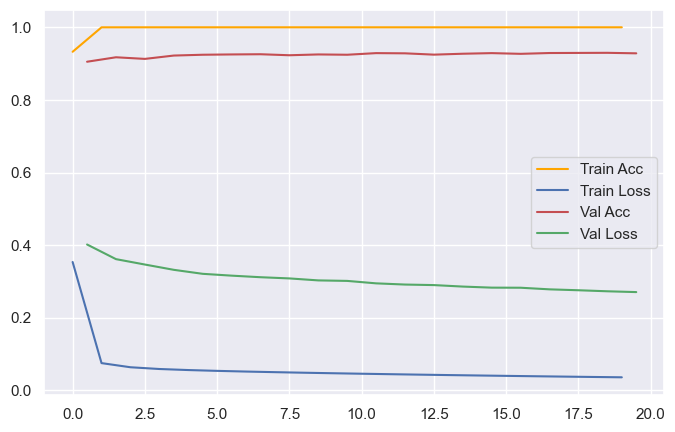

In [39]:
plot_history(history_cnn)

### 2.2.1 Exploring the Learning Rate

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.6292 - accuracy: 0.9513 - val_loss: 0.3724 - val_accuracy: 0.9194
Epoch 2/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0851 - accuracy: 1.0000 - val_loss: 0.2789 - val_accuracy: 0.9347
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0578 - accuracy: 1.0000 - val_loss: 0.2596 - val_accuracy: 0.9281
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.2415 - val_accuracy: 0.9364
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.2235 - val_accuracy: 0.9409
Epoch 6/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.2023 - val_accuracy: 0.9470
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.1979 - val_accuracy: 0.9428
Epo

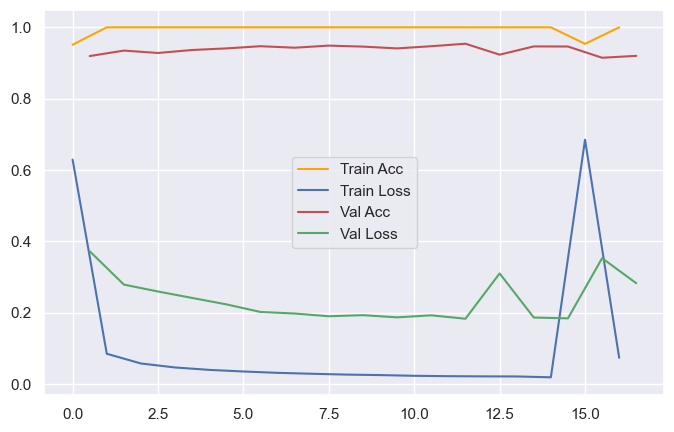

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.7619 - accuracy: 0.9288 - val_loss: 0.7660 - val_accuracy: 0.8935
Epoch 2/20
858/858 [==============================] - 8s 9ms/step - loss: 0.3700 - accuracy: 1.0000 - val_loss: 0.6337 - val_accuracy: 0.9016
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.2796 - accuracy: 1.0000 - val_loss: 0.5473 - val_accuracy: 0.9122
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.2167 - accuracy: 1.0000 - val_loss: 0.4787 - val_accuracy: 0.9149
Epoch 5/20
858/858 [==============================] - 8s 9ms/step - loss: 0.1718 - accuracy: 1.0000 - val_loss: 0.4317 - val_accuracy: 0.9147
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.1395 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 0.9225
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.1161 - accuracy: 1.0000 - val_loss: 0.3767 - val_accuracy: 0.9233
Epoch

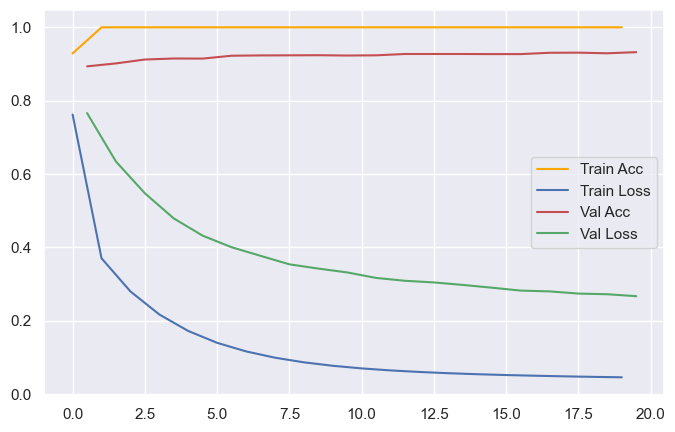

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 1.8998 - accuracy: 0.6245 - val_loss: 1.4875 - val_accuracy: 0.7211
Epoch 2/20
858/858 [==============================] - 8s 10ms/step - loss: 0.9051 - accuracy: 0.9292 - val_loss: 1.1346 - val_accuracy: 0.8238
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.6983 - accuracy: 0.9794 - val_loss: 0.9978 - val_accuracy: 0.8606
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.6062 - accuracy: 0.9932 - val_loss: 0.9226 - val_accuracy: 0.8753
Epoch 5/20
858/858 [==============================] - 8s 9ms/step - loss: 0.5536 - accuracy: 0.9979 - val_loss: 0.8705 - val_accuracy: 0.8890
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.5184 - accuracy: 0.9995 - val_loss: 0.8365 - val_accuracy: 0.8918
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.4920 - accuracy: 0.9997 - val_loss: 0.8068 - val_accuracy: 0.8979
Epoc

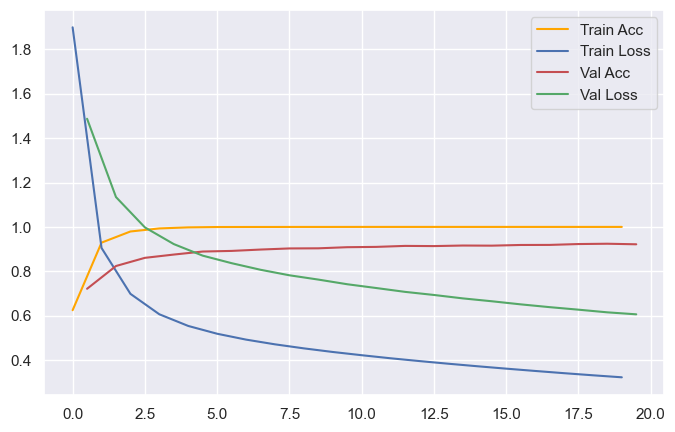

[[0.1, 0.953987717628479], [0.01, 0.9322364926338196], [0.001, 0.9241494536399841]]


In [248]:
# Learning rate
res_cnn=[]
for lr_cnn in [0.1,0.01,0.001]:
    valacc_cnn, history_cnn, discard_cnn = do_all_cnn(hiddensizes_cnn, actfn_cnn, optimizer_cnn, lr_cnn, n_epochs, batch_size)
    plot_history(history_cnn)
    res_cnn += [[lr_cnn,valacc_cnn]]
print(res_cnn)

Text(0, 0.5, 'Val Accuracy')

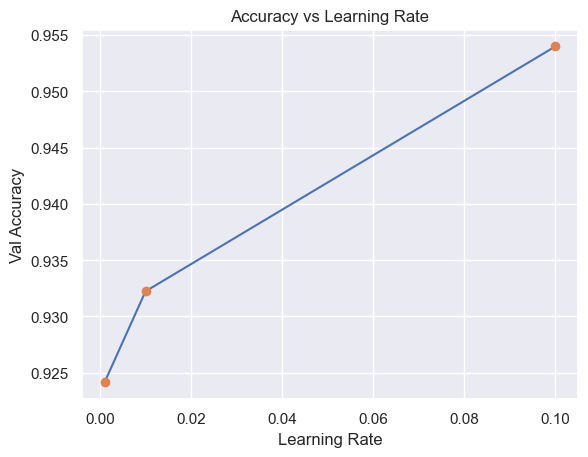

In [249]:
res_cnn=np.array(res_cnn)
plt.plot(res_cnn[:,0],res_cnn[:,1])
plt.plot(res_cnn[:,0],res_cnn[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

Although the model has the best accuracy when the learning rate is 0.1, the learning curve converges faster when the learning rate is 0.01.

### 2.2.2 Exploring the Optimiser

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 1.8331 - accuracy: 0.6500 - val_loss: 1.4418 - val_accuracy: 0.7103
Epoch 2/20
858/858 [==============================] - 8s 10ms/step - loss: 0.8402 - accuracy: 0.9482 - val_loss: 1.1050 - val_accuracy: 0.8115
Epoch 3/20
858/858 [==============================] - 8s 10ms/step - loss: 0.6511 - accuracy: 0.9870 - val_loss: 0.9779 - val_accuracy: 0.8480
Epoch 4/20
858/858 [==============================] - 8s 10ms/step - loss: 0.5724 - accuracy: 0.9967 - val_loss: 0.9035 - val_accuracy: 0.8714
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.5288 - accuracy: 0.9988 - val_loss: 0.8562 - val_accuracy: 0.8840
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.4990 - accuracy: 0.9994 - val_loss: 0.8161 - val_accuracy: 0.8935
Epoch 7/20
858/858 [==============================] - 8s 10ms/step - loss: 0.4760 - accuracy: 0.9998 - val_loss: 0.7854 - val_accuracy: 0.8974


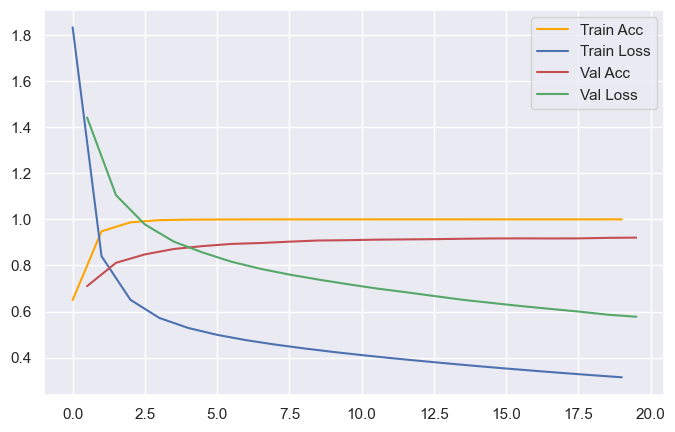

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.3978 - accuracy: 0.9630 - val_loss: 0.3302 - val_accuracy: 0.9286
Epoch 2/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0894 - accuracy: 0.9959 - val_loss: 1.4975 - val_accuracy: 0.6707
Epoch 3/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0781 - accuracy: 0.9988 - val_loss: 0.2060 - val_accuracy: 0.9523
Epoch 4/20
858/858 [==============================] - 8s 10ms/step - loss: 0.1316 - accuracy: 0.9913 - val_loss: 0.3743 - val_accuracy: 0.9448
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0503 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9495
Epoch 6/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.1651 - val_accuracy: 0.9559
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0369 - accuracy: 0.9978 - val_loss: 1.1785 - val_accuracy: 0.8137
E

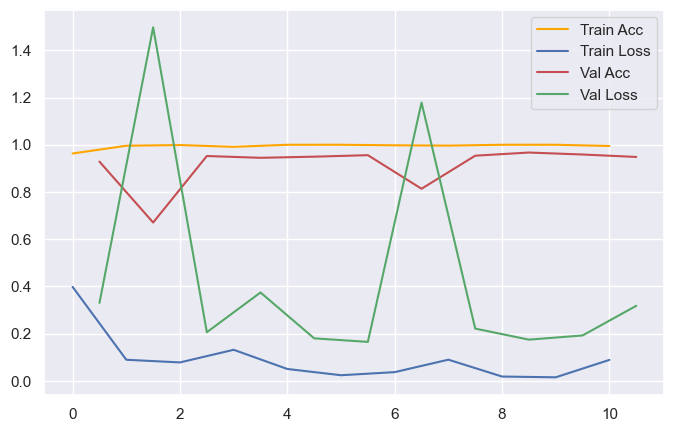

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.3577 - accuracy: 0.9544 - val_loss: 0.3018 - val_accuracy: 0.9216
Epoch 2/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0459 - accuracy: 0.9990 - val_loss: 0.2207 - val_accuracy: 0.9442
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0215 - accuracy: 0.9998 - val_loss: 0.1814 - val_accuracy: 0.9467
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0130 - accuracy: 0.9999 - val_loss: 0.2064 - val_accuracy: 0.9412
Epoch 5/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.2240 - val_accuracy: 0.9294
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0075 - accuracy: 0.9999 - val_loss: 0.1857 - val_accuracy: 0.9479
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1888 - val_accuracy: 0.9439
Epoch

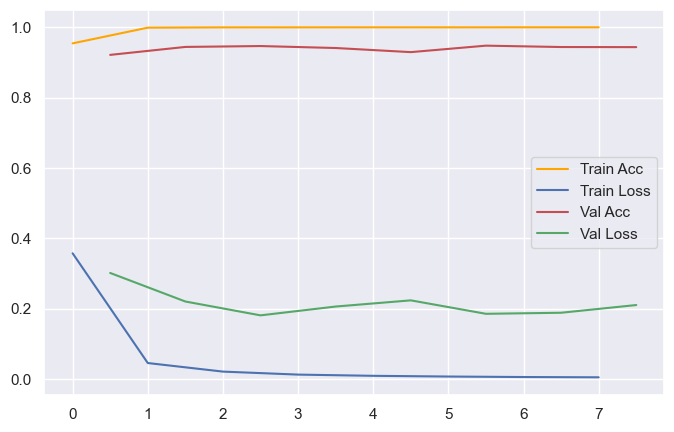

Epoch 1/20
858/858 [==============================] - 10s 10ms/step - loss: 0.3795 - accuracy: 0.9673 - val_loss: 0.3545 - val_accuracy: 0.9200
Epoch 2/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0752 - accuracy: 0.9976 - val_loss: 0.6695 - val_accuracy: 0.8790
Epoch 3/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0975 - accuracy: 0.9963 - val_loss: 0.2189 - val_accuracy: 0.9473
Epoch 4/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0716 - accuracy: 0.9948 - val_loss: 2.2928 - val_accuracy: 0.6704
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0842 - accuracy: 0.9988 - val_loss: 0.1968 - val_accuracy: 0.9481
Epoch 6/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.1810 - val_accuracy: 0.9565
Epoch 7/20
858/858 [==============================] - 9s 10ms/step - loss: 0.0493 - accuracy: 0.9967 - val_loss: 1.2313 - val_accuracy: 0.793

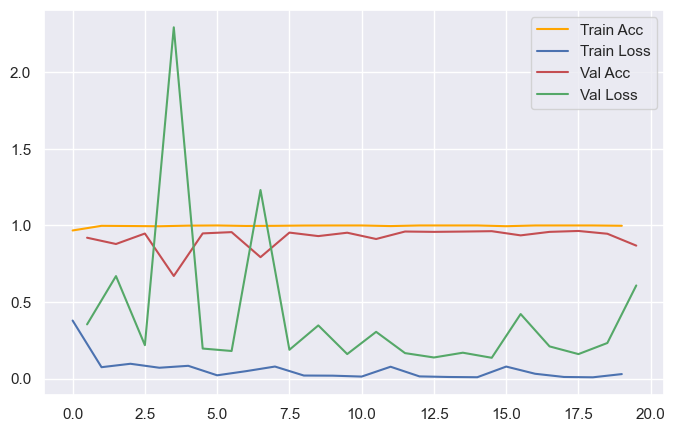

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.6675 - accuracy: 0.9442 - val_loss: 0.6220 - val_accuracy: 0.9261
Epoch 2/20
858/858 [==============================] - 8s 9ms/step - loss: 0.2301 - accuracy: 1.0000 - val_loss: 0.4028 - val_accuracy: 0.9339
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0924 - accuracy: 1.0000 - val_loss: 0.2838 - val_accuracy: 0.9431
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.9373
Epoch 5/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.2046 - val_accuracy: 0.9495
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9545
Epoch 7/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.1896 - val_accuracy: 0.9532
Epoc

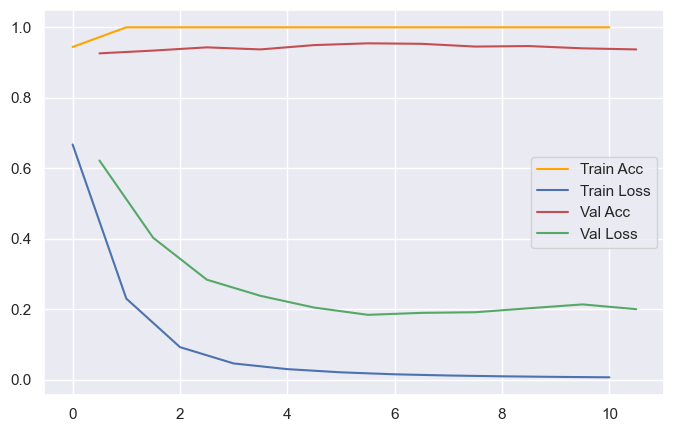

[[0.9208031296730042], [0.9670942425727844], [0.9478527903556824], [0.9640267491340637], [0.9545454382896423]]


In [250]:
res_opt_cnn=[]
optimizer_setup_cnn = [[keras.optimizers.SGD,0.01], [keras.optimizers.Adam,0.01],[keras.optimizers.RMSprop, 0.01], [keras.optimizers.Nadam, 0.01],[keras.optimizers.Adamax, 0.01]]
for optimizer_cnn,lr_cnn in optimizer_setup :
    valacc_cnn, history_cnn, discard_cnn = do_all_cnn(hiddensizes_cnn, actfn_cnn, optimizer_cnn, lr_cnn, n_epochs, batch_size)
    plot_history(history_cnn)
    res_opt_cnn += [[valacc_cnn]]
print(res_opt_cnn)


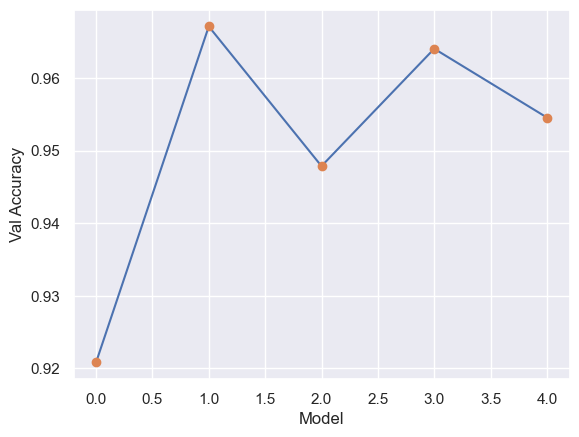

In [251]:
res_opt_cnn=np.array(res_opt_cnn)
plt.plot(res_opt_cnn)
plt.plot(res_opt_cnn,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

When the optimiser is Adam the accuracy is the best, but Adamax has a stable performance.

# 3. Model Selection, Final Results and Recommendation

Based on the accuracy of validation we chose CNN with Adam as the optimiser and 0.01 as the learning rate since it has the best accuracy (0.967). We also chose CNN with Adamax as a good alternative model because it has a smoother learning rate (better than Adam and Nadam), fair accuracy, which is 0.954 (better than SGD and RMSprop) and stable performance.

## 3.1 Model Selection

### 3.1.1 CNN with Adam

In [48]:
hiddensizes_cnn = [32, 32, 64]  # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn_cnn = "relu"
# Optimiser and learning rate
optimizer_adam = keras.optimizers.Adam
learningrate_cnn = 0.01   
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 20

In [49]:
valacc, history, model_adam = do_all_cnn(hiddensizes_cnn, actfn_cnn, optimizer_adam, learningrate_cnn,n_epochs, batch_size)

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.6705 - accuracy: 0.9294 - val_loss: 1.6239 - val_accuracy: 0.7284
Epoch 2/20
858/858 [==============================] - 8s 10ms/step - loss: 0.1445 - accuracy: 0.9946 - val_loss: 0.1645 - val_accuracy: 0.9515
Epoch 3/20
858/858 [==============================] - 8s 10ms/step - loss: 0.3413 - accuracy: 0.9774 - val_loss: 1.2128 - val_accuracy: 0.7434
Epoch 4/20
858/858 [==============================] - 8s 10ms/step - loss: 0.2154 - accuracy: 0.9869 - val_loss: 0.5662 - val_accuracy: 0.8887
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.3598 - accuracy: 0.9791 - val_loss: 0.2985 - val_accuracy: 0.9395
Epoch 6/20
858/858 [==============================] - 9s 10ms/step - loss: 0.0535 - accuracy: 0.9989 - val_loss: 0.1944 - val_accuracy: 0.9495
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.5040 - accuracy: 0.9787 - val_loss: 0.3746 - val_accuracy: 0.9322


113/113 [==============================] - 0s 3ms/step
Accuracy for label A: 1.00
Accuracy for label B: 1.00
Accuracy for label C: 1.00
Accuracy for label D: 1.00
Accuracy for label E: 1.00
Accuracy for label F: 1.00
Accuracy for label G: 0.85
Accuracy for label H: 0.96
Accuracy for label I: 1.00
Accuracy for label K: 0.99
Accuracy for label L: 1.00
Accuracy for label M: 0.92
Accuracy for label N: 0.83
Accuracy for label O: 1.00
Accuracy for label P: 1.00
Accuracy for label Q: 1.00
Accuracy for label R: 0.92
Accuracy for label S: 0.92
Accuracy for label T: 0.75
Accuracy for label U: 0.91
Accuracy for label V: 0.94
Accuracy for label W: 0.89
Accuracy for label X: 0.99
Accuracy for label Y: 0.92
Median accuracy: 0.99


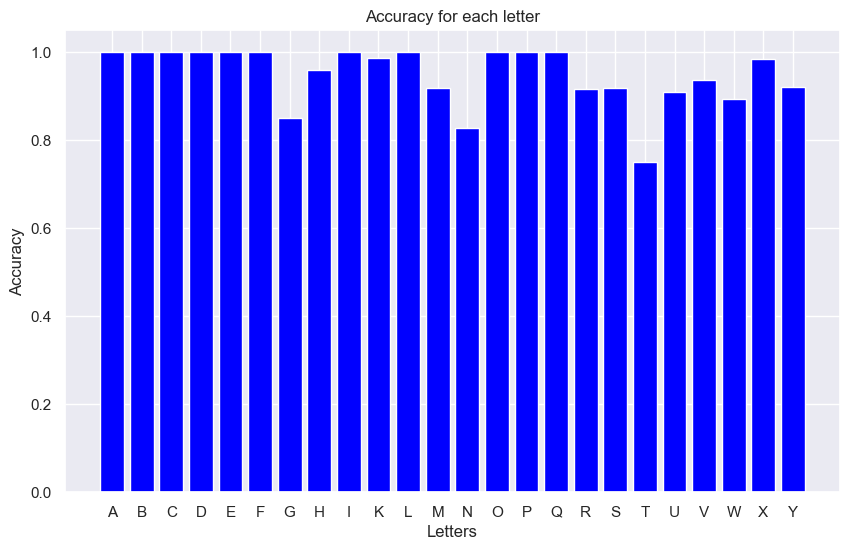

In [50]:
# Caculate the accuracy for each letter and median accuracy for CNN model on validation set
y_valid_pred = np.argmax(model_adam.predict(X_valid), axis=-1)
label_accuracies = {}
for i, class_name in enumerate(class_names_remap):
    
    indices = np.where(y_valid == i)[0]
    label_accuracy = np.mean(y_valid_pred[indices] == y_valid[indices])
    label_accuracies[class_name] = label_accuracy

for label, accuracy in label_accuracies.items():
    print(f"Accuracy for label {label}: {accuracy:.2f}")

# Calculate and print the median accuracy
median_accuracy = np.median(list(label_accuracies.values()))
print(f"Median accuracy: {median_accuracy:.2f}")

labels = list(label_accuracies.keys())
accuracies = list(label_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Letters')
plt.ylabel('Accuracy')
plt.title('Accuracy for each letter')
plt.show()

### 3.1.2 CNN with Adamax

In [43]:
hiddensizes_cnn = [32, 32, 64]  # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn_cnn = "relu"
# Optimiser and learning rate
optimizer_adamax = keras.optimizers.Adamax
learningrate_cnn = 0.01   
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 20

In [44]:
valacc, history, model_adamax = do_all_cnn(hiddensizes_cnn, actfn_cnn, optimizer_adamax, learningrate_cnn,n_epochs, batch_size)

Epoch 1/20
858/858 [==============================] - 9s 10ms/step - loss: 0.3282 - accuracy: 0.9602 - val_loss: 0.3130 - val_accuracy: 0.9297
Epoch 2/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.2357 - val_accuracy: 0.9384
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0352 - accuracy: 0.9977 - val_loss: 0.3520 - val_accuracy: 0.9194
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9378
Epoch 5/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0122 - accuracy: 0.9998 - val_loss: 0.3440 - val_accuracy: 0.9021
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0145 - accuracy: 0.9993 - val_loss: 0.1769 - val_accuracy: 0.9403
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0092 - accuracy: 0.9997 - val_loss: 0.5963 - val_accuracy: 0.8483
Epoc

113/113 [==============================] - 0s 3ms/step
Accuracy for label A: 1.00
Accuracy for label B: 1.00
Accuracy for label C: 1.00
Accuracy for label D: 1.00
Accuracy for label E: 0.96
Accuracy for label F: 1.00
Accuracy for label G: 0.85
Accuracy for label H: 0.92
Accuracy for label I: 0.92
Accuracy for label K: 0.99
Accuracy for label L: 1.00
Accuracy for label M: 1.00
Accuracy for label N: 0.74
Accuracy for label O: 1.00
Accuracy for label P: 1.00
Accuracy for label Q: 1.00
Accuracy for label R: 0.57
Accuracy for label S: 1.00
Accuracy for label T: 0.70
Accuracy for label U: 0.91
Accuracy for label V: 0.95
Accuracy for label W: 1.00
Accuracy for label X: 1.00
Accuracy for label Y: 0.87
Median accuracy: 1.00


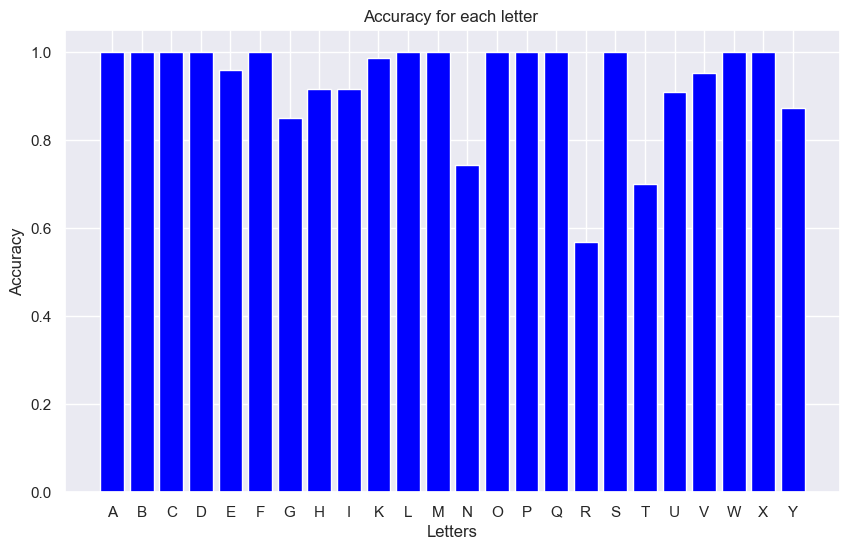

In [47]:
y_valid_pred = np.argmax(model_adamax.predict(X_valid), axis=-1)
label_accuracies = {}
for i, class_name in enumerate(class_names_remap):
    
    indices = np.where(y_valid == i)[0]
    label_accuracy = np.mean(y_valid_pred[indices] == y_valid[indices])
    label_accuracies[class_name] = label_accuracy

for label, accuracy in label_accuracies.items():
    print(f"Accuracy for label {label}: {accuracy:.2f}")

# Calculate and print the median accuracy
median_accuracy = np.median(list(label_accuracies.values()))
print(f"Median accuracy: {median_accuracy:.2f}")

labels = list(label_accuracies.keys())
accuracies = list(label_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Letters')
plt.ylabel('Accuracy')
plt.title('Accuracy for each letter ')
plt.show()

### 3.1.3 Best Model

After calculating the median accuracy and each letter's accuracy for each model, we can conclude that CNN with Adam (learning rate = 0.01) is the best model since the overall median and individual accuracies are better than baseline and the other model. Although, the median accuracy (99%) meets the requirement (>=94%), the individual accuracy of N (83%), T (75%) fail to meet the criteria (85%).

## 3.2 Final Results

113/113 [==============================] - 0s 3ms/step
Accuracy for label A: 1.00
Accuracy for label B: 1.00
Accuracy for label C: 1.00
Accuracy for label D: 1.00
Accuracy for label E: 1.00
Accuracy for label F: 1.00
Accuracy for label G: 0.86
Accuracy for label H: 0.94
Accuracy for label I: 1.00
Accuracy for label K: 1.00
Accuracy for label L: 1.00
Accuracy for label M: 0.93
Accuracy for label N: 0.92
Accuracy for label O: 1.00
Accuracy for label P: 1.00
Accuracy for label Q: 1.00
Accuracy for label R: 0.88
Accuracy for label S: 0.87
Accuracy for label T: 0.69
Accuracy for label U: 0.93
Accuracy for label V: 0.94
Accuracy for label W: 0.91
Accuracy for label X: 0.98
Accuracy for label Y: 0.94
Median accuracy: 0.99


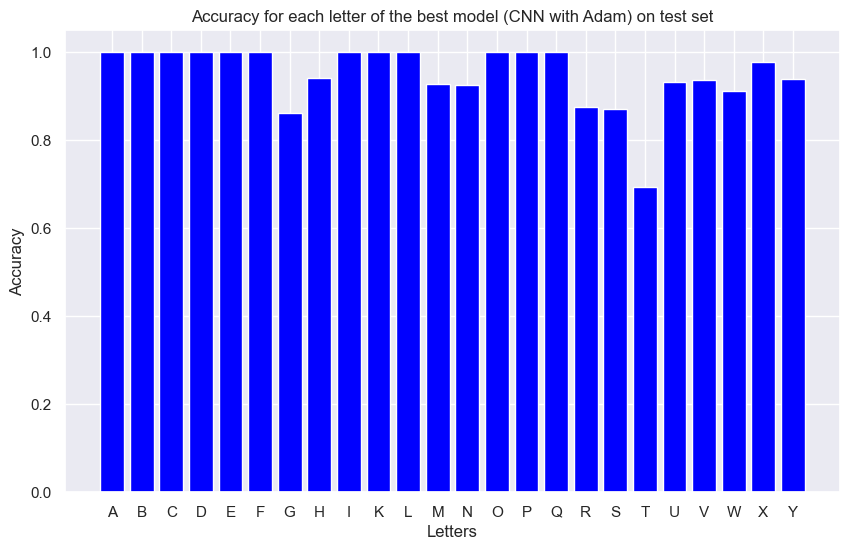

In [54]:
# Caculate the accuracy for each letter and median accuracy for best CNN model on test set
y_test_pred = np.argmax(model_adam.predict(X_test), axis=-1)
label_accuracies_test = {}
for i, class_name in enumerate(class_names_remap):
    
    indices = np.where(y_test == i)[0]
    label_accuracy_test = np.mean(y_test_pred[indices] == y_test[indices])
    label_accuracies_test[class_name] = label_accuracy_test

for label, accuracy in label_accuracies_test.items():
    print(f"Accuracy for label {label}: {accuracy:.2f}")

# Calculate and print the median accuracy
median_accuracy = np.median(list(label_accuracies_test.values()))
print(f"Median accuracy: {median_accuracy:.2f}")

labels = list(label_accuracies_test.keys())
accuracies = list(label_accuracies_test.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Letters')
plt.ylabel('Accuracy')
plt.title('Accuracy for each letter of the best model (CNN with Adam) on test set')
plt.show()

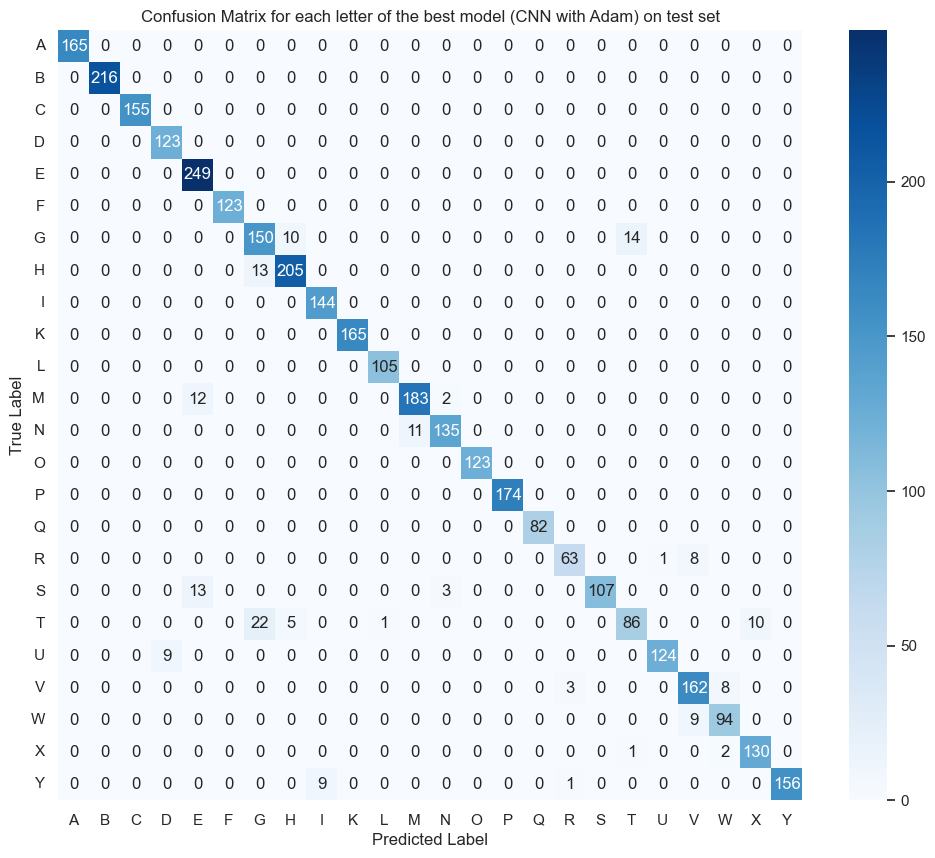

In [55]:
# Display confusion matrix on test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (12, 10))
sns.heatmap(cm, annot = True, cmap = "Blues", fmt="d", xticklabels = class_names_remap, yticklabels = class_names_remap)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for each letter of the best model (CNN with Adam) on test set")
plt.xticks()
plt.yticks(rotation = 0)
plt.show()

1. The unbiased median accuracy is 0.99.
2. The letters with the highest individual accuracy are A, B, C, D, E, F, I, K, L, O, P, Q (100%).
3. The letter with the lowest individual accuracy is T (69%).
4. According to the confusion matrix, the three most common single types of error are T which is mislabeled as G (22), G which is misclassified as T (14) and S which is inaccurately predicted as E (13).

## 3.3 Recommendation

We need to continue optimising the model that we chose since the accuracy of letter T (69%) fails to the requirement (85%) even though the overall median accuracy and almost every letter's accuracy meet the criteria. We can try to increase layers or the number of filters. We can also apply data augmentation to the underperforming letter to increase its variability in the training set.